In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

In [10]:
#Convert churn column to numeric
data["Churn"]=data["Churn"].map({"Yes":1,"No":0})

In [11]:
#Create Tenure Stats
data["tenure_groups"]=pd.cut(data["tenure"],bins=[0,12,36,data["tenure"].max()],labels=["0-12 months","13-36 months","37+ months"],include_lowest=True)
tenure_stats = data.groupby("tenure_groups",observed=True).agg({"MonthlyCharges":["mean","median","min","max"],"Churn":"mean"}).reset_index()
print("Tenure Group Statistics") 
print(tenure_stats)

Tenure Group Statistics
  tenure_groups MonthlyCharges                            Churn
                          mean  median    min     max      mean
0   0-12 months      56.097781  55.900  18.75  112.95  0.474382
1  13-36 months      63.248195  69.675  18.25  116.25  0.255388
2    37+ months      72.008730  80.300  18.40  118.75  0.119294


In [17]:
#Churn by deamographics
deamographic_features = ["gender","SeniorCitizen","Contract","PaymentMethod"]
for features in deamographic_features:
    churn_rate = data.groupby(features)["Churn"].mean()
    print(f"Churn Rate by {features}\n")
    print(churn_rate)


Churn Rate by gender

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64
Churn Rate by SeniorCitizen

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64
Churn Rate by Contract

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64
Churn Rate by PaymentMethod

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64


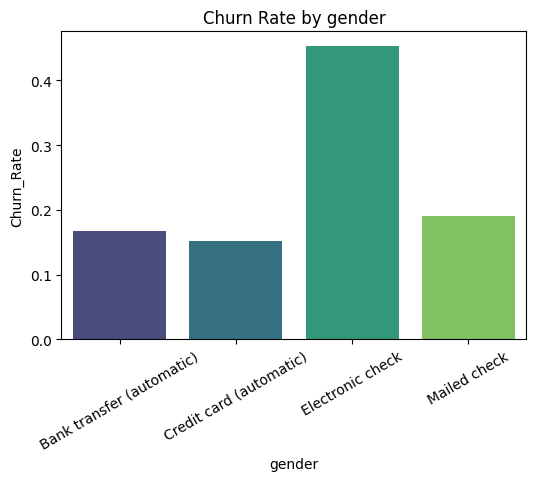

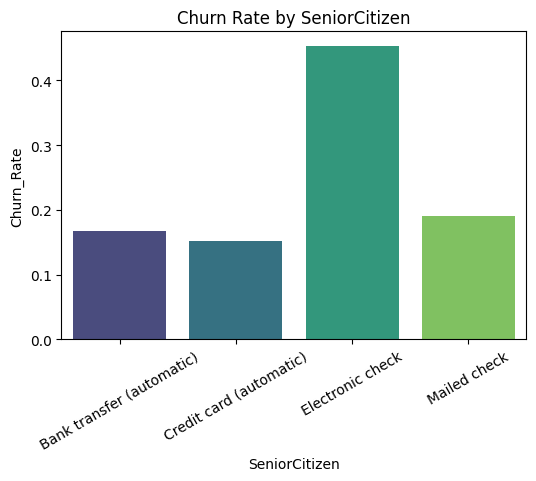

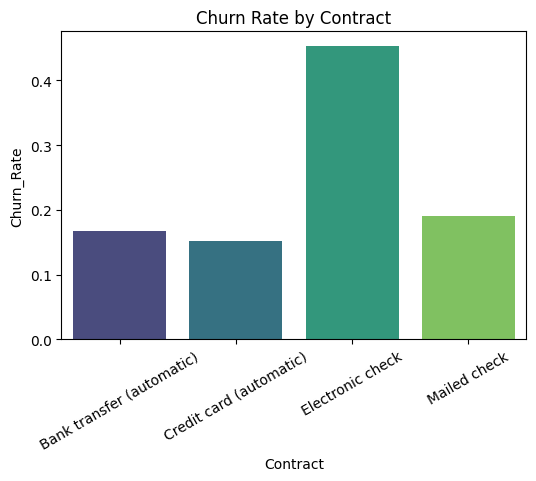

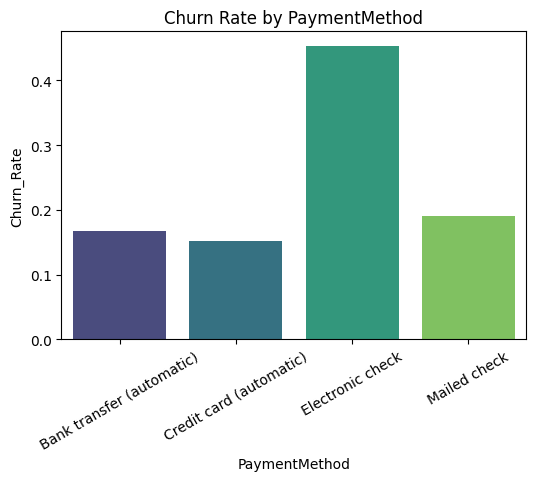

In [24]:
#churn rate Visualization 
for features in deamographic_features:
    plt.figure(figsize=(6,4))
    sns.barplot(x=churn_rate.index,y=churn_rate.values,hue=churn_rate.index,palette="viridis",legend=False)
    plt.title(f"Churn Rate by {features}")
    plt.xlabel(features)
    plt.ylabel("Churn_Rate")
    plt.xticks(rotation=30)
    plt.show()